In [18]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np

# Step 2: Correct official sales data
real_sales_data = {
    'Year': [
        2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
        2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
        2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
        2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
        2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
        2025, 2025, 2025
    ],
    'Month': [
        'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
        'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
        'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
        'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
        'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
        'JAN', 'FEB', 'MAR'
    ],
    'Sales_Amount': [
        515119, 515330, 468324, 401028, 478449, 518038, 526304, 530735, 541302, 539114, 533941, 538548,
        559230, 544891, 603581, 608961, 605282, 611950, 601817, 605533, 609671, 618573, 624874, 619938,
        631509, 638101, 651027, 660194, 659847, 666113, 659550, 663566, 661854, 668671, 659458, 651763,
        680253, 672152, 665071, 670494, 673902, 677117, 678424, 684755, 689403, 686148, 685328, 686277,
        680456, 685280, 688248, 688913, 691223, 690682, 699098, 697522, 703079, 707613, 712145, 717662,
        711461, 711680, 722025
    ]
}

# Step 3: Create DataFrame
sales_table = pd.DataFrame(real_sales_data)

# Step 4: See the first few rows
sales_table.head(20)


,Year,Month,Sales_Amount
0,2020,JAN,515119
1,2020,FEB,515330
2,2020,MAR,468324
3,2020,APR,401028
4,2020,MAY,478449
5,2020,JUN,518038
6,2020,JUL,526304
7,2020,AUG,530735
8,2020,SEP,541302
9,2020,OCT,539114


In [26]:
# Step 5: Create Month Number using mapping
month_to_number = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
sales_table['Month_Number'] = sales_table['Month'].map(month_to_number)

# Step 6: Create Full Date column
sales_table['Full_Date'] = pd.to_datetime(dict(
    year=sales_table['Year'],
    month=sales_table['Month_Number'],
    day=1
))

# Step 7: Final clean dataset
final_sales_data = sales_table[['Full_Date', 'Sales_Amount']].sort_values('Full_Date')

# Step 8: View the result
final_sales_data.head(20)

# You first map month names like 'JAN', 'FEB' to their numeric values (1, 2, etc.) using a dictionary.
# Then you combine Year + Month Number into a full date (like 2020-01-01) using pd.to_datetime.
# After that, you select only two columns — Full_Date and Sales_Amount — to keep the dataset clean.
# Finally, you sort the data by Full_Date to maintain correct time order for modeling.


,Full_Date,Sales_Amount
0,2020-01-01,515119
1,2020-02-01,515330
2,2020-03-01,468324
3,2020-04-01,401028
4,2020-05-01,478449
5,2020-06-01,518038
6,2020-07-01,526304
7,2020-08-01,530735
8,2020-09-01,541302
9,2020-10-01,539114


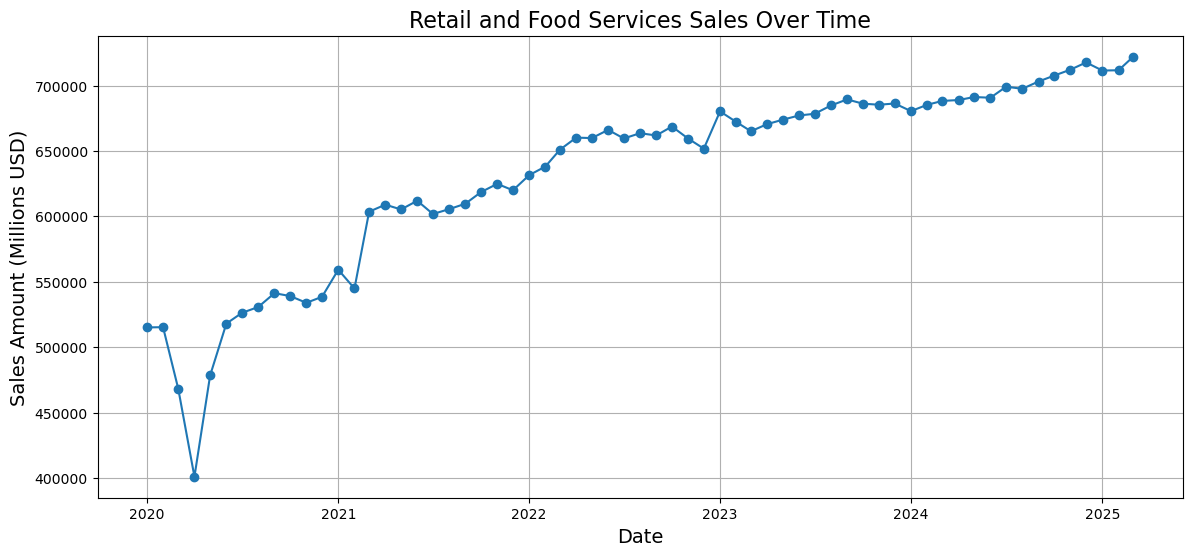

In [28]:
import matplotlib.pyplot as plt

# Step 9: Plot sales over time
plt.figure(figsize=(14, 6))
plt.plot(final_sales_data['Full_Date'], final_sales_data['Sales_Amount'], marker='o')
plt.title('Retail and Food Services Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Amount (Millions USD)', fontsize=14)
plt.grid(True)
plt.show()

# | Line | Meaning |
# | `plt.figure(figsize=(14,6))` | Creates a large graph |
# | `plt.plot()` | Plots Date vs Sales line chart |
# | `marker='o'` | Puts dots on each data point |
# | `title, xlabel, ylabel` | Adds nice labels |
# | `grid=True` | Adds background grid for easy reading |

In [54]:
# Step 10: Train-Test Split (60% train, 40% test)
total_samples = len(final_sales_data)
train_size = int(total_samples * 0.6)  # Use 60% for training

# Split the data
train_data = final_sales_data[:train_size]
test_data = final_sales_data[train_size:]

print("Total records:", total_samples)
print("Training records:", len(train_data))
print("Testing records:", len(test_data))

# This code splits your full sales data into a training set and a testing set.
# It takes the first 80% of the months (oldest data) for training, and the last 20% (most recent data) for testing.
# We use len() to count total rows and then slice the DataFrame accordingly.
# This time-based split is important in time series so the model learns from the past and predicts the future.
# Finally, it prints how many records are used for training and testing.



Total records: 63
Training records: 37
Testing records: 26


In [56]:
# Step 11 
# LSTM models work best when numbers are between 0 and 1
# (because it helps the neural network learn faster and more accurately).
# We use a tool called MinMaxScaler from the sklearn library.

# MinMaxScaler uses the formula:

# scaled value
# =(𝑥−min)/(max−min)
 
# It fits on the training data only to learn the min and max, then applies the same rule to test data.
# This helps the model learn patterns more efficiently and prevents future data leakage.

from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the sales values — ONLY use training data to fit!
train_scaled = scaler.fit_transform(train_data[['Sales_Amount']])
test_scaled = scaler.transform(test_data[['Sales_Amount']])


In [58]:
# Step 12: Create sequences for LSTM
def create_sequences(data, sequence_length=12):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Create sequences from scaled training and test data
X_train, y_train = create_sequences(train_scaled, sequence_length=12)
X_test, y_test = create_sequences(test_scaled, sequence_length=12)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# we reshape the time series data into supervised learning format for LSTM.
# We define a fixed sequence length (e.g., 12) and use a sliding window to extract sub-sequences from the scaled data.
# Each input sample X[i] is a 2D array of shape (12, 1), representing 12 consecutive time steps (months).
# The corresponding target y[i] is the scalar value immediately following that sequence, i.e., y[i] = X[i+12].
# This transforms a 1D time series of length n into (n - 12) samples suitable for sequence learning.
# The result is stored as NumPy arrays: X_train, y_train, X_test, y_test, ready for LSTM input.
# This structure allows the LSTM to capture temporal dependencies and learn sequential patterns in sales behavior.


X_train shape: (25, 12, 1)
y_train shape: (25, 1)
X_test shape: (14, 12, 1)
y_test shape: (14, 1)


In [60]:
# Step 13: Build and train the LSTM model

!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 13: Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

# In this step, we build a neural network using an LSTM (Long Short-Term Memory) layer, which is designed to learn patterns from sequences like time series.
# Each input to the model is a sequence of 12 consecutive months of sales (X_train), and the model learns to predict the next month’s sales (y_train).
# We start by using a Sequential() model, which lets us stack layers in order.
# Then we add an LSTM layer with 50 units, which acts like memory cells that learn from the 12-month sequence.
# The input shape we give is (12, 1) — meaning each input has 12 time steps, and each step has 1 feature (the sales amount).
# After the LSTM, we add a Dense layer with 1 unit, which outputs the predicted sales number.
# We compile the model using the Adam optimizer, a popular algorithm for training neural networks efficiently.
# The loss function is "mse" (mean squared error), which measures how far our predictions are from actual sales values.
# Then we train the model using model.fit() for 100 epochs, meaning it looks at the data 100 times to learn.
# During training, it also checks performance on X_test and y_test to make sure it's learning general patterns, not just memorizing.
# As training progresses, you’ll see the loss decrease — this means the model is improving its predictions.
# After training, this model will be ready to predict future sales based on the most recent 12 months of data.

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - loss: 0.8930 - val_loss: 1.4837
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8658 - val_loss: 1.4388
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8395 - val_loss: 1.3964
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8145 - val_loss: 1.3556
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7904 - val_loss: 1.3158
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7671 - val_loss: 1.2771
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7444 - val_loss: 1.2394
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7224 - val_loss: 1.2026
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7017 - val_loss: 1.1691
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6820 - val_loss: 1.1364
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6627 - val_loss: 1.1042
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6436 - val_loss: 1.0725


In [61]:
# Step 14: Predict on test data
y_pred_scaled = model.predict(X_test)

# Inverse transform both predictions and actual test labels
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))


# This code uses the trained LSTM model to predict sales for the test data sequences.
# The predictions and true values are currently scaled between 0 and 1, so we use inverse_transform() to convert them back to the original sales range.
# We reshape both y_pred_scaled and y_test to 2D arrays because MinMaxScaler expects that format.
# After this step, y_pred holds the predicted monthly sales, and y_true holds the actual sales.
# These are now ready for plotting and comparison to evaluate how well the model performed.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


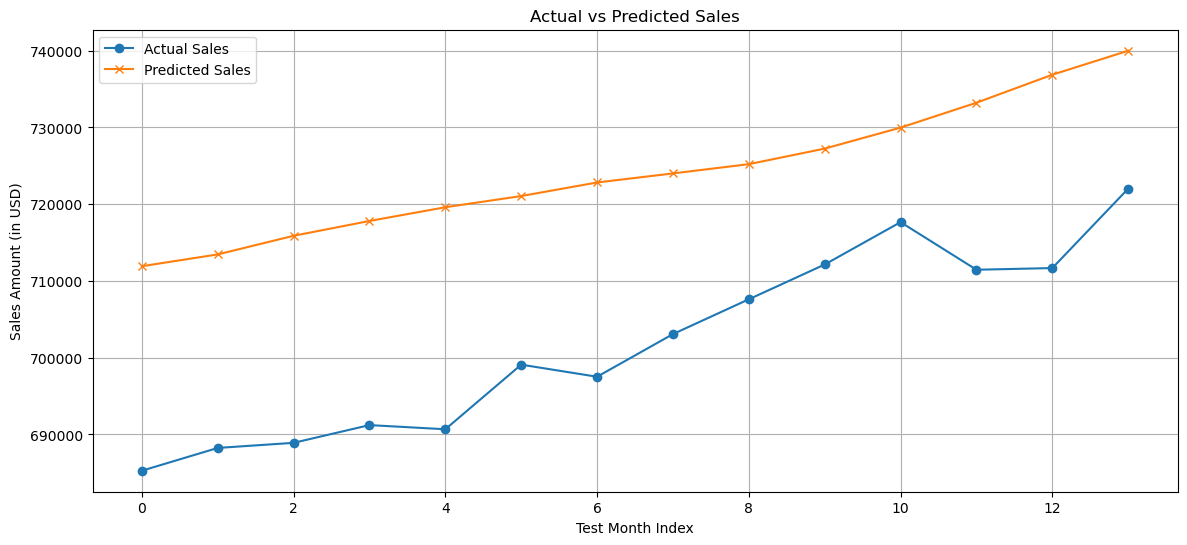

In [62]:
# Step 15: Plot
import matplotlib.pyplot as plt
import numpy as np

# Create a simple index for test months
test_months = np.arange(len(y_true))

plt.figure(figsize=(14, 6))
plt.plot(test_months, y_true, label='Actual Sales', marker='o')
plt.plot(test_months, y_pred, label='Predicted Sales', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Month Index')
plt.ylabel('Sales Amount (in USD)')
plt.legend()
plt.grid(True)
plt.show()

# The graph shows a comparison between the actual sales (blue line) and the sales predicted by the LSTM model (orange line) for the test months.
# Each point on the X-axis represents a month from the test period (e.g., Mar 2024 to Mar 2025).
# The actual sales line shows some ups and downs, reflecting real fluctuations in the market.
# The predicted sales line is much smoother and steadily increasing, which means the model is learning a general upward trend but missing short-term variations.
# This suggests that while the model understands the overall direction, it lacks accuracy in capturing monthly seasonality or sharp changes.
# To improve this, we can train longer, tune the model, or add external features like CPI or holidays.



In [66]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 16: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# RMSE (Root Mean Squared Error) measures the average difference between predicted and actual sales.
# In our case, the model predicts monthly sales with an average error of about $22,831.



Root Mean Squared Error (RMSE): 22830.58


In [72]:
# STEP 17 - CALCULATING COEFFICIENT OF DETERMINATION
# R² measures how well your model explains the variation in the actual data.
# R² = 1.0 → Perfect prediction
# R² = 0.0 → Model predicts as bad as guessing the average
# R² < 0 → Model is worse than just guessing the mean

from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.4f}")

# our predictions don't follow the ups and downs of real data

# They're just smooth and flat or always increasing

# So R² says:

# "You aren’t doing better than just always guessing the average... in fact, you’re doing worse!"


R² Score: -2.8864


In [75]:
!pip install fredapi

In [77]:
from fredapi import Fred

# Initialize FRED connection
fred = Fred(api_key='b0391ad5b3af4088c918f169838a5158')


In [79]:
import pandas as pd

# Set the date range
start_date = '2020-01-01'
end_date = '2025-03-31'

# Fetch CPI (Consumer Price Index)
cpi = fred.get_series('CPIAUCSL', observation_start=start_date, observation_end=end_date)

# Fetch Unemployment Rate
unemp = fred.get_series('UNRATE', observation_start=start_date, observation_end=end_date)

# Convert to DataFrames with datetime index
cpi_df = cpi.reset_index()
cpi_df.columns = ['Date', 'CPI']
unemp_df = unemp.reset_index()
unemp_df.columns = ['Date', 'Unemployment']

# Merge both into one DataFrame
econ_df = pd.merge(cpi_df, unemp_df, on='Date')
econ_df['Date'] = pd.to_datetime(econ_df['Date'])
econ_df = econ_df.set_index('Date').resample('MS').mean().reset_index()

econ_df.head()

# Downloads monthly CPI and Unemployment Rate data from Jan 2020 to Mar 2025

# Formats them with Date column to align with your sales data

# Merges both into a single DataFrame: econ_df with columns:
# ➤ Date, CPI, Unemployment




,Date,CPI,Unemployment
0,2020-01-01,259.127,3.6
1,2020-02-01,259.250,3.5
2,2020-03-01,258.076,4.4
3,2020-04-01,256.032,14.8
4,2020-05-01,255.802,13.2


In [125]:
# # Merge sales data with economic indicators

# # Rename 'Full_Date' to 'Date' to match econ_df
# sales_df = final_sales_data.rename(columns={'Full_Date': 'Date'})

# # Merge on the Date column
# combined_df = pd.merge(sales_df, econ_df, on='Date')

# # Final columns: Date, Sales_Amount, CPI, Unemployment
# combined_df.head()

from sklearn.preprocessing import MinMaxScaler
import joblib

# Step 1: Select feature columns used in model
feature_cols = ['Sales_Amount', 'CPI', 'Unemployment', 'Month']
combined_df['Month'] = combined_df['Date'].dt.month  # Add Month column if not done

# Step 2: Fit scaler
scaler = MinMaxScaler()
scaler.fit(combined_df[feature_cols])

# Step 3: Save the fitted scaler
joblib.dump(scaler, 'scaler.save')


['scaler.save']

In [123]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Step B6: Select features and scale
feature_cols = ['Sales_Amount', 'CPI', 'Unemployment']
scaler = MinMaxScaler()
import joblib
joblib.dump(scaler, 'scaler.save')

# Fit and transform
scaled_data = scaler.fit_transform(combined_df[feature_cols])

# Store back in DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=feature_cols)
scaled_df['Date'] = combined_df['Date']

scaled_df.head()

# A DataFrame where:

# Sales_Amount, CPI, Unemployment are all scaled to [0, 1]

# scaled_df is now your final input for modeling

# Why this matters:
# LSTM expects numerical inputs on the same scale, so CPI (~250) and Sales (~700K) won’t confuse the network.




,Sales_Amount,CPI,Unemployment,Date
0,0.355427,0.051975,0.017544,2020-01-01
1,0.356084,0.053898,0.008772,2020-02-01
2,0.209647,0.035546,0.087719,2020-03-01
3,0.000000,0.003595,1.000000,2020-04-01
4,0.241189,0.000000,0.859649,2020-05-01


In [85]:
# Create sequences for multivariate input

def create_multivariate_sequences(data, sequence_length=12):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        # 12 rows × 3 features
        X.append(data[i:i+sequence_length, :])
        # y = next month's Sales_Amount (column 0)
        y.append(data[i+sequence_length, 0])
    return np.array(X), np.array(y)

# Prepare final 2D NumPy array (drop Date column)
data_array = scaled_df[['Sales_Amount', 'CPI', 'Unemployment']].values

# Create sequences
X, y = create_multivariate_sequences(data_array, sequence_length=12)

# Split again into train/test (we’ll use 80/20 here)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Show shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (40, 12, 3)
y_train shape: (40,)
X_test shape: (11, 12, 3)
y_test shape: (11,)


In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step : Build multivariate LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Predict sales only

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))
model.save('sales_lstm_model.h5')


# Layer	Purpose
# LSTM(64)	Learns sequential patterns from 12 months × 3 features
# Dense(32)	Adds learning capacity
# Dense(1)	Predicts next month’s sales
# loss='mse'	Mean Squared Error for regression accuracy


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.6938 - val_loss: 0.9594
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6339 - val_loss: 0.8752
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5764 - val_loss: 0.7988
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5224 - val_loss: 0.7241
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4712 - val_loss: 0.6507
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4249 - val_loss: 0.5758
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3787 - val_loss: 0.4992
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3328 - val_loss: 0.4162
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2752 - val_loss: 0.3232
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2163 - val_loss: 0.2202
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1492 - val_loss: 0.1116
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0803 - val_loss: 0.0196
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
📊 RMSE: 4668.68
📈 R² Score: 0.7772


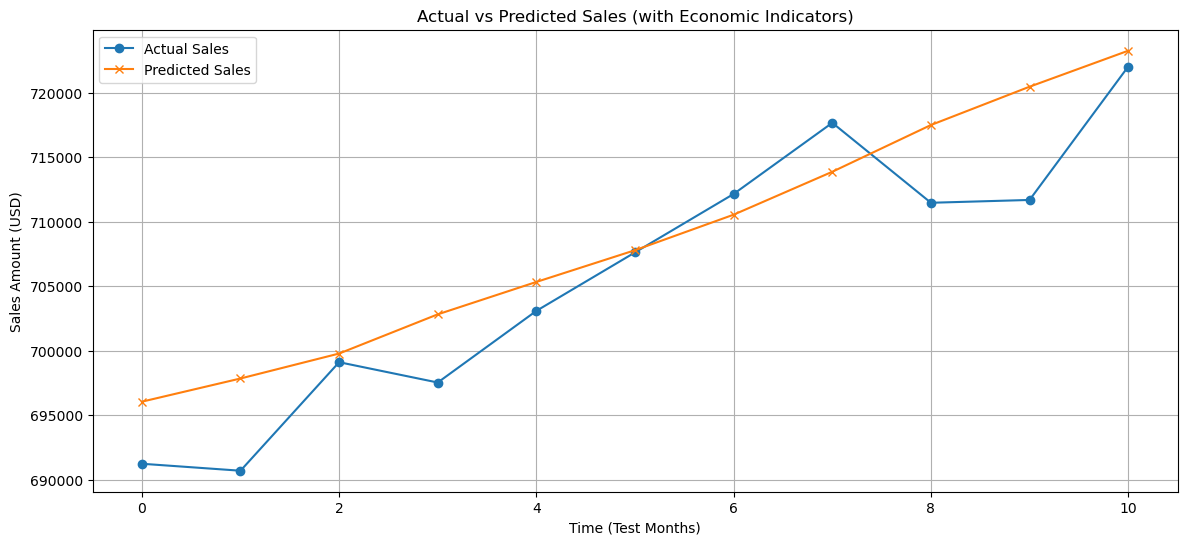

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step : Predict
y_pred_scaled = model.predict(X_test)

# Step: Inverse scale y_pred and y_test
# We'll create dummy arrays with the same shape as the original feature set, filling only column 0 with predictions
y_pred_full = np.zeros((len(y_pred_scaled), 3))
y_test_full = np.zeros((len(y_test), 3))

y_pred_full[:, 0] = y_pred_scaled[:, 0]
y_test_full[:, 0] = y_test

# Inverse transform
y_pred_actual = scaler.inverse_transform(y_pred_full)[:, 0]
y_test_actual = scaler.inverse_transform(y_test_full)[:, 0]

# Step: Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"📊 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.4f}")

# Step: Plot
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Sales', marker='o')
plt.plot(y_pred_actual, label='Predicted Sales', marker='x')
plt.title('Actual vs Predicted Sales (with Economic Indicators)')
plt.xlabel('Time (Test Months)')
plt.ylabel('Sales Amount (USD)')
plt.legend()
plt.grid(True)
plt.show()

# A score of 0.7772 means your model explains ~77.7% of all variation in monthly sales.
# This is very strong for a real-world regression problem, especially using macroeconomic inputs.

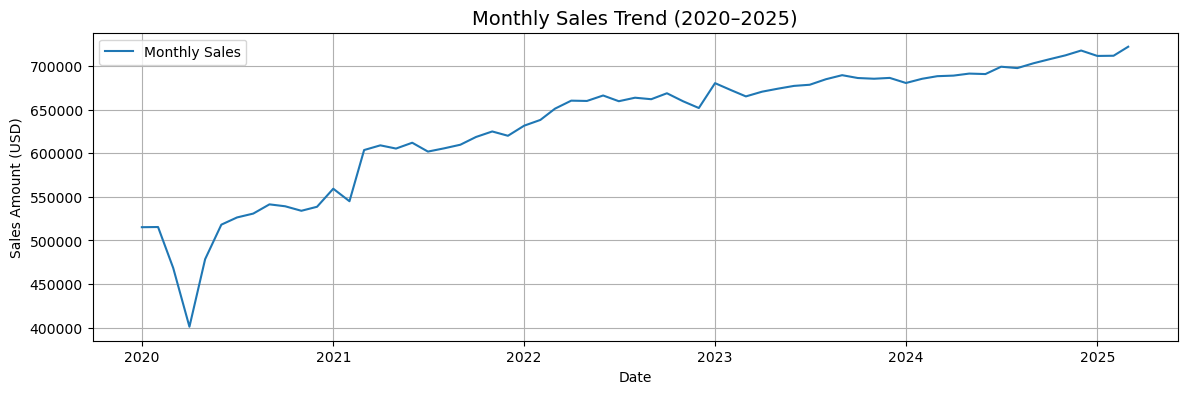

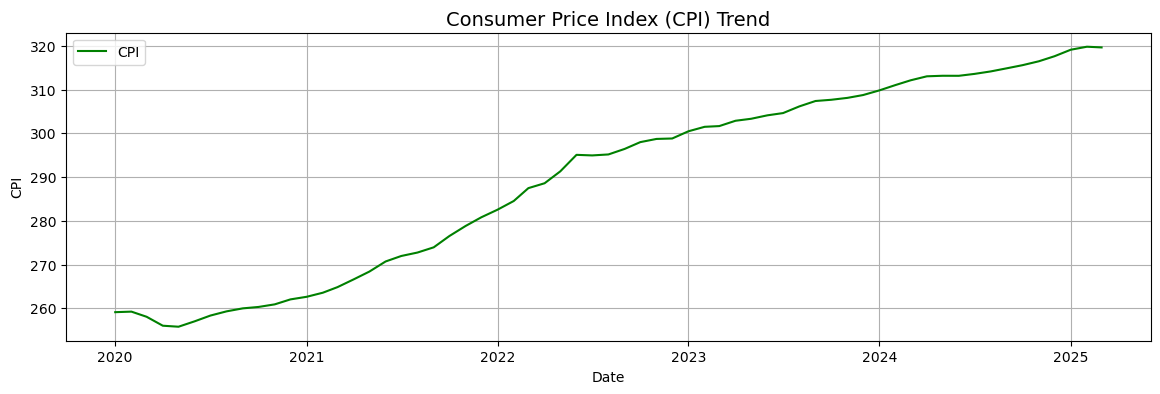

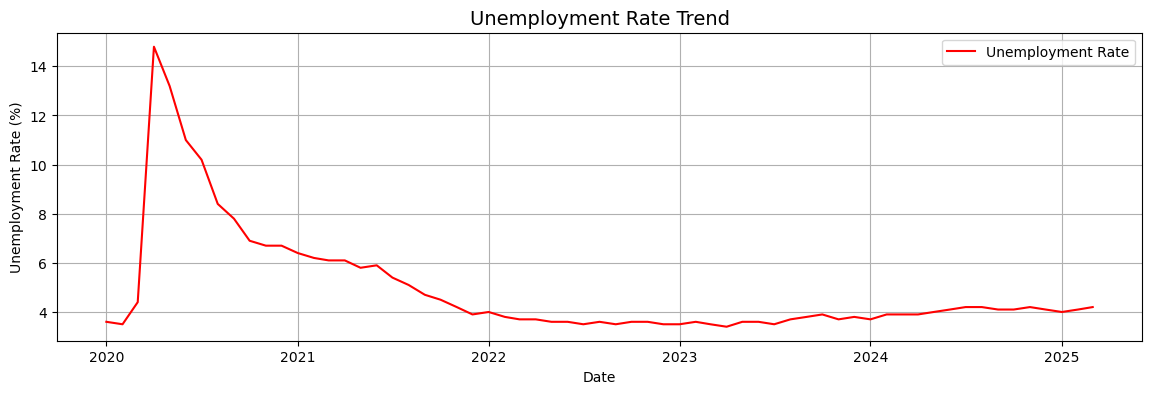

In [93]:
# Plot sales trend over time
plt.figure(figsize=(14, 4))
plt.plot(combined_df['Date'], combined_df['Sales_Amount'], label='Monthly Sales')
plt.title("Monthly Sales Trend (2020–2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sales Amount (USD)")
plt.grid(True)
plt.legend()
plt.show()

# Plot CPI trend
plt.figure(figsize=(14, 4))
plt.plot(combined_df['Date'], combined_df['CPI'], color='green', label='CPI')
plt.title("Consumer Price Index (CPI) Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("CPI")
plt.grid(True)
plt.legend()
plt.show()

# Plot Unemployment Rate trend
plt.figure(figsize=(14, 4))
plt.plot(combined_df['Date'], combined_df['Unemployment'], color='red', label='Unemployment Rate')
plt.title("Unemployment Rate Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.legend()
plt.show()


In [98]:
# Step C1: Add 'Month' feature (1–12) to the merged dataset
combined_df['Month'] = combined_df['Date'].dt.month

# Final feature list
feature_cols = ['Sales_Amount', 'CPI', 'Unemployment', 'Month']


In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_df[feature_cols])

# Create new DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=feature_cols)
scaled_df['Date'] = combined_df['Date']


In [102]:
def create_sequences(data, sequence_length=12):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, :])
        y.append(data[i+sequence_length, 0])  # Sales_Amount is still target
    return np.array(X), np.array(y)

data_array = scaled_df[feature_cols].values
X, y = create_sequences(data_array, sequence_length=12)

# Train-test split (80/20 again)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Predict only Sales

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.6412 - val_loss: 0.8135
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5535 - val_loss: 0.7244
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4886 - val_loss: 0.6349
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4291 - val_loss: 0.5393
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3688 - val_loss: 0.4386
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3076 - val_loss: 0.3398
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2422 - val_loss: 0.2472
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1782 - val_loss: 0.1528
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1145 - val_loss: 0.0654
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0571 - val_loss: 0.0067
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - val_loss: 0.0207
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - val_loss: 0.1020
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
📊 RMSE (with Month): 5183.87
📈 R² Score (with Month): 0.7253


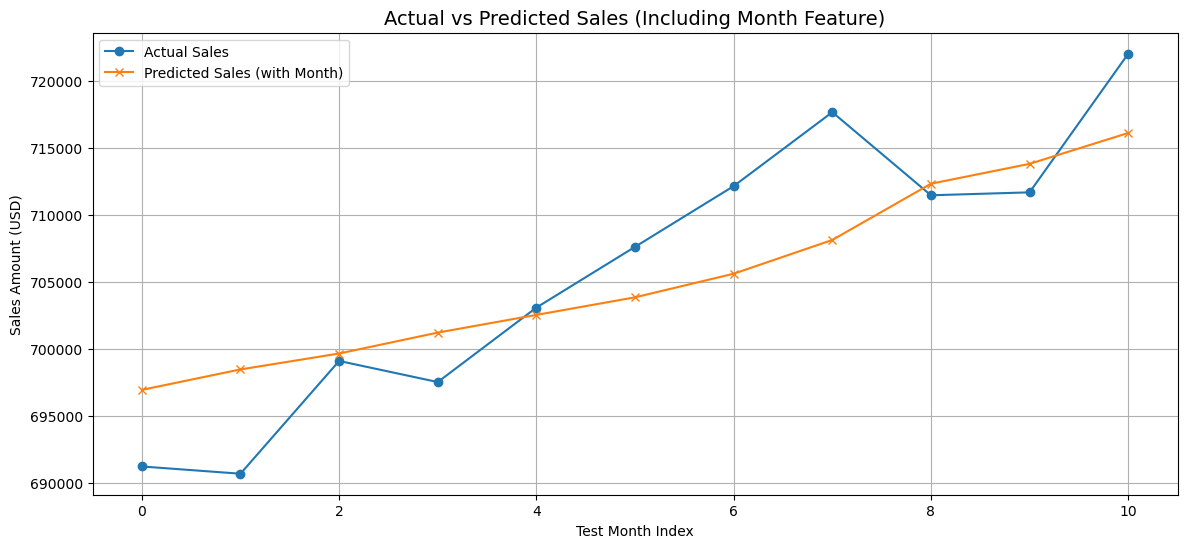

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred_scaled = model.predict(X_test)

# Reconstruct for inverse scaling
y_pred_full = np.zeros((len(y_pred_scaled), 4))  # 4 features now
y_test_full = np.zeros((len(y_test), 4))

y_pred_full[:, 0] = y_pred_scaled[:, 0]
y_test_full[:, 0] = y_test

# Inverse transform to get real sales values
y_pred_actual = scaler.inverse_transform(y_pred_full)[:, 0]
y_test_actual = scaler.inverse_transform(y_test_full)[:, 0]

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"📊 RMSE (with Month): {rmse:.2f}")
print(f"📈 R² Score (with Month): {r2:.4f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Sales', marker='o')
plt.plot(y_pred_actual, label='Predicted Sales (with Month)', marker='x')
plt.title('Actual vs Predicted Sales (Including Month Feature)', fontsize=14)
plt.xlabel('Test Month Index')
plt.ylabel('Sales Amount (USD)')
plt.legend()
plt.grid(True)
plt.show()


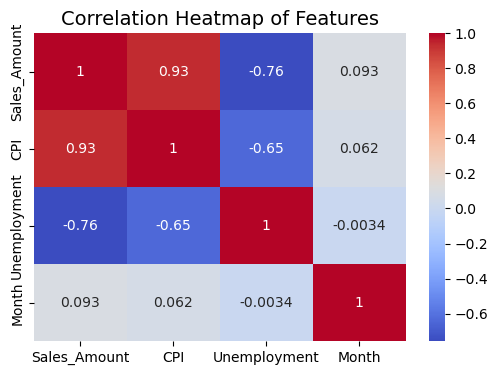

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(combined_df[['Sales_Amount', 'CPI', 'Unemployment', 'Month']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()


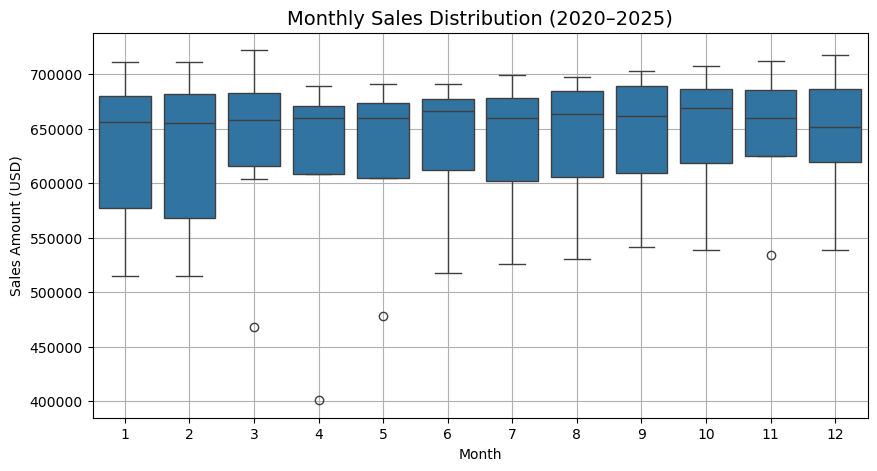

In [110]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Sales_Amount', data=combined_df)
plt.title("Monthly Sales Distribution (2020–2025)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Sales Amount (USD)")
plt.grid(True)
plt.show()


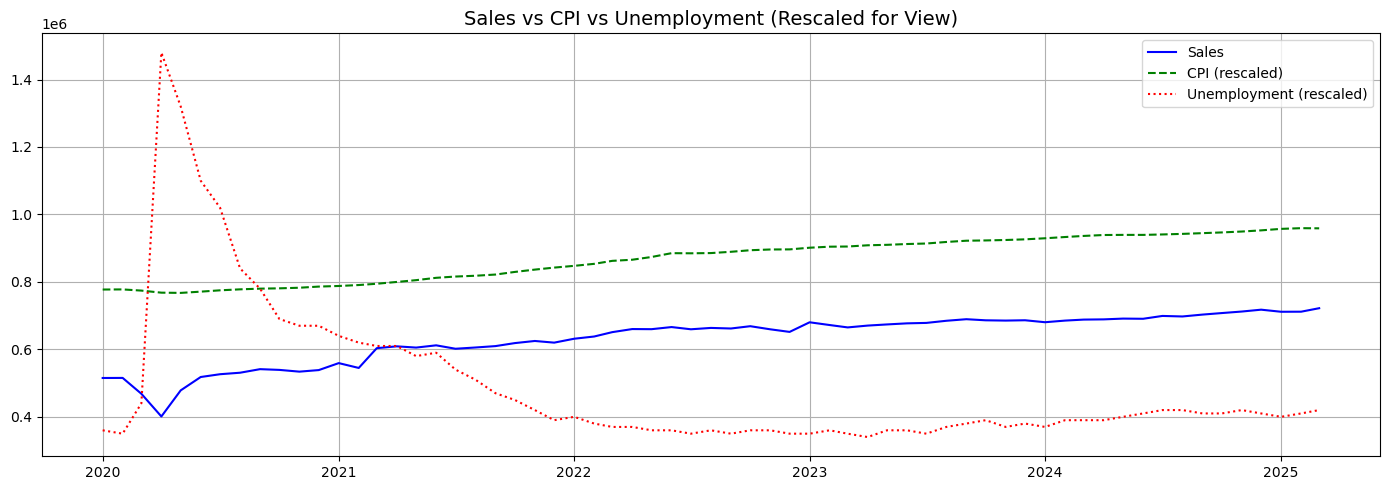

In [112]:
plt.figure(figsize=(14, 5))
plt.plot(combined_df['Date'], combined_df['Sales_Amount'], label='Sales', color='blue')
plt.plot(combined_df['Date'], combined_df['CPI'] * 3000, label='CPI (rescaled)', color='green', linestyle='--')
plt.plot(combined_df['Date'], combined_df['Unemployment'] * 100000, label='Unemployment (rescaled)', color='red', linestyle=':')
plt.title("Sales vs CPI vs Unemployment (Rescaled for View)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


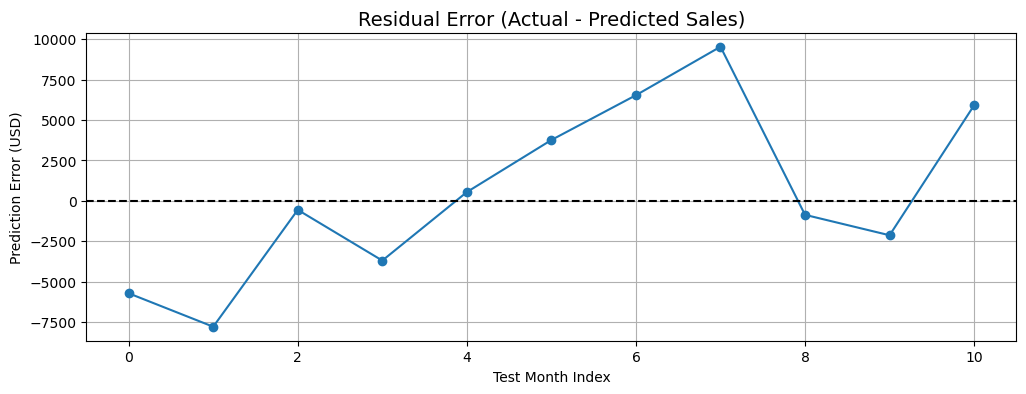

In [114]:
errors = y_test_actual - y_pred_actual
plt.figure(figsize=(12, 4))
plt.plot(errors, marker='o')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Error (Actual - Predicted Sales)", fontsize=14)
plt.xlabel("Test Month Index")
plt.ylabel("Prediction Error (USD)")
plt.grid(True)
plt.show()


In [116]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [128]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Assuming your cleaned final DataFrame is named 'combined_df'
# and includes: Date, Sales_Amount, CPI, Unemployment, Month, Year

# Step 1: Limit to 2020–2025 data
recent_df = combined_df[combined_df['Date'].dt.year >= 2020].copy()

# Step 2: Create necessary features
recent_df['Month'] = recent_df['Date'].dt.month
recent_df['Year'] = recent_df['Date'].dt.year

# Step 3: Define the columns used for training
feature_cols = ['Sales_Amount', 'CPI', 'Unemployment', 'Month', 'Year']

# Step 4: Fit the scaler
scaler = MinMaxScaler()
scaler.fit(recent_df[feature_cols])

# Step 5: Save the scaler to disk
joblib.dump(scaler, 'scaler_2020_2025.save')
print("✅ Scaler saved successfully.")


✅ Scaler saved successfully.


In [130]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Step 1: Use your cleaned sales + economic data
recent_df = combined_df[combined_df['Date'].dt.year >= 2020].copy()

# Step 2: Extract necessary 4 columns
recent_df['Month'] = recent_df['Date'].dt.month
feature_cols = ['Sales_Amount', 'CPI', 'Unemployment', 'Month']

# Step 3: Fit the scaler
scaler = MinMaxScaler()
scaler.fit(recent_df[feature_cols])

# Step 4: Save it
joblib.dump(scaler, 'scaler_4features.save')
print("✅ Scaler saved successfully with 4 features.")


✅ Scaler saved successfully with 4 features.


In [132]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# Load your dataset
df = pd.read_csv("combined_data_2020_2025.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Features for training
features = ['Sales_Amount', 'CPI', 'Unemployment', 'Month']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

# Save the scaler
joblib.dump(scaler, "scaler_4features.save")
print("✅ Scaler saved as 'scaler_4features.save'")

# Create sequences: 12 months → predict 13th
X, y = [], []
for i in range(12, len(scaled_data)):
    X.append(scaled_data[i-12:i])   # input: 12 time steps
    y.append(scaled_data[i][0])     # target: sales only

X, y = np.array(X), np.array(y)
print("Input shape:", X.shape)

# Build model
model = Sequential()
model.add(LSTM(64, input_shape=(12, 4)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train
es = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X, y, validation_split=0.2, epochs=100, batch_size=16, callbacks=[es])

# Save model
model.save("sales_lstm_model.h5")
print("✅ Model saved as 'sales_lstm_model.h5'")


✅ Scaler saved as 'scaler_4features.save'
Input shape: (51, 12, 4)
Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.9669 - val_loss: 0.8898
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6220 - val_loss: 0.4298
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3073 - val_loss: 0.1156
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1091 - val_loss: 8.2640e-04
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0190 - val_loss: 0.1111
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0760 - val_loss: 0.1567
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0733 - val_loss: 0.0723
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0344 - val_loss: 0.0130
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0120 - val_loss: 5.1792e-04
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0104 - val_loss: 0.0055
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0166 - val_loss: 0.0101
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0267 - val_loss: 

✅ Model saved as 'sales_lstm_model.h5'


In [134]:
import joblib
joblib.dump(scaler, "scaler_4features.save")
print("✅ Scaler saved as 'scaler_4features.save'")


✅ Scaler saved as 'scaler_4features.save'


In [136]:
!pip install tensorflow


In [138]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [166]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load your dataset and model
df = pd.read_csv("combined_data_2020_2025.csv")
model = load_model("sales_lstm_model.h5", compile=False)
scaler = joblib.load("scaler_4features.save")

# Prepare last 12 months of real input
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
features = ['Sales_Amount', 'CPI', 'Unemployment', 'Month']
last_12 = df[features].iloc[-12:]

# Scale the last 12 months properly
scaled_input = scaler.transform(last_12)

# Reshape for LSTM input: (1 sequence, 12 timesteps, 4 features)
X_input = scaled_input.reshape(1, 12, 4)

# Predict and inverse scale
scaled_pred = model.predict(X_input)
padded = np.zeros((1, 4))
padded[0, 0] = scaled_pred[0, 0]  # predicted sales
predicted_sales = scaler.inverse_transform(padded)[0, 0]

print(f"📈 Predicted Sales for April 2025: ${predicted_sales:,.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
📈 Predicted Sales for April 2025: $723,956.01


In [154]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


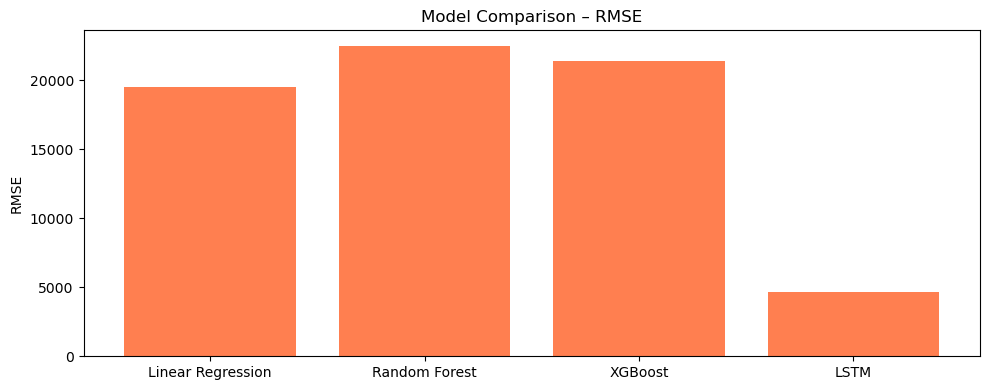

In [170]:
import matplotlib.pyplot as plt

# Updated results from evaluation
results = {
    "Linear Regression": {"RMSE": 19514.08, "R2": -2.1330},
    "Random Forest": {"RMSE": 22506.45, "R2": -3.1675},
    "XGBoost": {"RMSE": 21443.19, "R2": -2.7831},
    "LSTM": {"RMSE": 4668.68, "R2": 0.7772}
}

models = list(results.keys())
rmse_values = [results[m]["RMSE"] for m in models]
r2_values = [results[m]["R2"] for m in models]

# 📉 RMSE Plot (Lower is Better)
plt.figure(figsize=(10, 4))
plt.bar(models, rmse_values, color='coral')
plt.title("Model Comparison – RMSE")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

# # 📈 R² Score Plot (Higher is Better)
# plt.figure(figsize=(10, 4))
# plt.bar(models, r2_values, color='mediumseagreen')
# plt.title("Model Comparison – R² Score")
# plt.ylabel("R² Score")
# plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Zero line
# plt.tight_layout()
# plt.show()
